In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

### Physics Behind Fragments

This Notebook will be used to give a good estimation to fragment velocities for different sized fragments. This notebook will also be used to get a "feel" for velocitities of fragments. This analysis will be very low level and be realtively simple.

According to Newton Laws of motion, An object will remain at rest unless acted on by a force. This will be the basis of this analysis.

$F_{net}=MA$

We can create a free body diagram to understand all the forces the fragment experiences once an explosion happens.

The main force would be the force propelling the fragment which comes from the chamber pressure. This force is usually made up of the blast obverpressure decay data which can give us a dynamic pressure which then propels the fragment. However for the purposes of this analysis, it is decided to just use the pressure experienced at the time of explosion.

The two secondary forces are the same for any object moving through a fluid. the first being the drag force which is the resistance of an object flowing through the medium. THe second force is the gravitational force that all objects experience.

<img src="fragment free body.PNG">

Now that we understand what forces are acting on the fragment. We can find the net force acting on the fragment.
$F_{net} = P_{Chamber}A - \frac{C_{D}A \rho V^2}{2} - mg$

We can now plug the net force equation into the newtons equation

$ P_{Chamber}A - \frac{C_{D}A \rho V^2}{2} - mg = m \frac{dV}{dt}$

Now we can solve for $\frac{dV}{dt}$

$\frac{dV}{dt} = \frac{P_{Chamber}A}{m} - \frac{C_{D}A\rho V^{2}}{2m} - g$

This is the velocity equation which will be used later.

### ODE from above

In [27]:
def Velocity(P,A,rho,cd,m,t,v): 
    return PA - ((cd*(V**2)*A*rho)/(2*m))-g

### Pressure, Radius,Thickness, CD, and Density

In [28]:
# Array for pressure (specfied from mike) by a psi
Psi =np.array([200,450,1000,10000,100000,1000000,1500000])
print(len(Psi))

#array for Radius (0.0254-1.524m) by 1/100th of an meter
interval = (1.524-0.0254)/len(Psi)
r = np.array(np.arange(0.0254,1.524,(interval)))
             
#Density will be held as constant for now (SS304)
rho = 8000 #kg/m^3
             
#Acceleration due to gravity
g = 9.81 #m/s^2

#thickness is from sch 10 SS304
th = 4.19/1000 #m (mm to m)

#Cd is from https://sv.20file.org/up1/916_0.pdf conclsion section
cd = 1.21 #dimsonless

7


### Finding Area, Volume, and Mass

In [29]:
def Area(r):
    A = np.pi * r**2
    return A

def Volume(r,th):
    Vol=np.pi*(r**2)*th
    return Vol

def Mass(Vol,rho):
    M = Vol * rho
    return M

#Calculate the Area for all Radii
i=0
A = np.zeros(len(r))
for i in range(0,len(r)):
    A[i]=Area(r[i])
    i=i+1


#Calculate the Volume for all Radii
i=0
Vol = np.zeros(len(r))
for i in range(0,len(r)):
    Vol[i] = Volume(r[i],th)
    i=i+1

#Calculate the Mass of each fragment
i=0
M = np.zeros(len(Vol))
for i in range(0,len(Vol)):
    M[i] = Mass(Vol[i],rho)
    i=i+1

### Changing Pressure (psi to Pa)

In [30]:
def Psi_to_Pa(Psi):
    P = Psi * 6894.76
    return P

i=0
P = np.zeros(len(Psi))
for i in range(0,len(Psi)):
    P[i] = Psi_to_Pa(Psi[i])
    i=i+1

### Finding $F_{net}$

$F_{net}$ for the first case will just be the chamber pressure. Therefore, $F_{net} = P_{Chamber}A$.

In [31]:
size_P = len(P)
size_A = len(A)
#print(type(size_P))
F_net = np.zeros((size_P,size_A))
j=0
i=0
for i in range(len(P)):
    for j in range(len(A)):
        F_net[i,j] = P[i] * (A[j]/M[j])
        j=j+1
    i=i+1 

### Now lets solve for Velocity

THis is a very simple integral to solve for. After the integral is complete, you should find that

$v = \frac{F}{M} * t + C$

Now you to get rid of the C all we have to do is use the initial condition that at time 0 before the tank breaks, the velocity is obvisouly 0. Therefor....

$v = \frac{F}{M} * t $

In [32]:
#######Change the below Value#########
t=0.008
#######Chane the above Value##########

Vel = np.zeros((len(P),len(A)))
j=0
i=0
for i in range(len(P)):
    for j in range(len(A)):
        Vel[i,j] = F_net[i,j]*t
        j=j+1
    i=i+1 

In [33]:
Vel_ft = np.zeros((len(P),len(A)))
j=0
i=0
for i in range(len(P)):
    for j in range(len(A)):
        Vel_ft[i,j] = Vel[i,j]*3.2808399
        j=j+1
    i=i+1 

### SOLVE ODE

In [34]:
#PA = P[10000]*A[1]
#K = (cd*A[1]*rho)/(2*M[1])

In [35]:
#def Velocity(t,y): 
    #return PA - K*(y**2)-g

In [36]:
#sol = solve_ivp(Velocity,[0,1], [0], t_eval=np.linspace(0,1,100))
#print(sol.t)
#print(sol.y)

### Creating Excel Sheet

In [37]:
df = pd.DataFrame (Vel,columns=A,index=P)
df2= pd.DataFrame(Vel_ft,columns=A,index=P)
df.to_excel("Initial_Vel_Frag_Analysis.xlsx")
df2.to_excel("Initial_Velft_Frag_Analysis.xlsx")

### Create Graphs

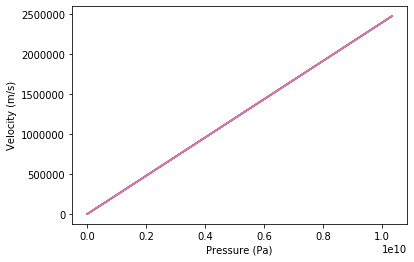

In [38]:
plt.plot(df)
plt.ylabel("Velocity (m/s)")
plt.xlabel("Pressure (Pa)")
plt.show()

In [39]:
### Change Velocity from m/s to ft/s

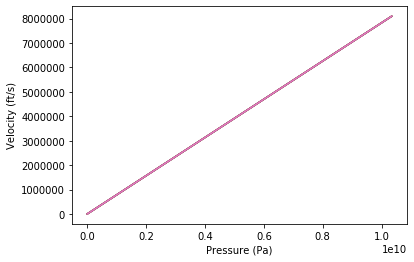

In [40]:
plt.plot(df2)
plt.ylabel("Velocity (ft/s)")
plt.xlabel("Pressure (Pa)")
plt.show()

### Lets solve for time of acceleration of fragments

In [50]:
########CONSTANTS##############
A = 76.83 #in^2 average from test 9 fragments
thickness = 0.38 #in from average test 9 fragment
dens = 8000 #kg/m^3
V = 9000 #fastest and earliest fragment from test 5 ft/s
##################################

##########FUNCTIONS################
def ins_ms(A_1):
    A = A_1*0.00064516
    return A
def ftps_mps(V_1):
    V = V_1*0.3048
    return V
def in_m(thickness_1):
    thickness = thickness_1*0.0254
    return thickness

####################################

############SI UNITS BELOW###############
A = ins_ms(A) #m^2
V = ftps_mps(V) #m/s
thickness = in_m(thickness) #m

#############Calculations#################
M = (A*thickness)*rho
t = np.zeros(len(P))
for i in range(len(P)):
    t[i] = (V*M)/(P[i]*A)
    i = i+1
print(t)
print(P)

[1.53608633e-01 6.82705034e-02 3.07217265e-02 3.07217265e-03
 3.07217265e-04 3.07217265e-05 2.04811510e-05]
[1.378952e+06 3.102642e+06 6.894760e+06 6.894760e+07 6.894760e+08
 6.894760e+09 1.034214e+10]


Pressure (Pa)  Time of Contact (s)
                     0
1.378952e+06  0.153609
3.102642e+06  0.068271
6.894760e+06  0.030722
6.894760e+07  0.003072
6.894760e+08  0.000307
6.894760e+09  0.000031
1.034214e+10  0.000020


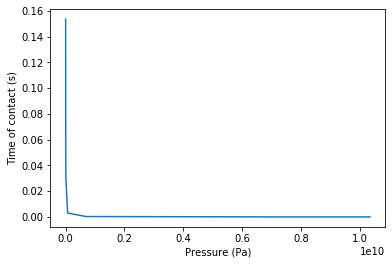

In [57]:
print('Pressure (Pa) ', 'Time of Contact (s)')
df3= pd.DataFrame(t, index = P)
print(df3)
df3.to_excel("time_of_Accel_Frag.xlsx")
plt.plot(df3)
plt.ylabel("Time of contact (s)")
plt.xlabel("Pressure (Pa)")
plt.show()